<a href="https://colab.research.google.com/github/dyutivartak/ML-Projects/blob/main/Energy%20Efficiency%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/Energy Efficiency Dataset.csv')

## Taking care of missing data

In [3]:
dataset.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

There is no missing data present.

## EDA

In [4]:
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


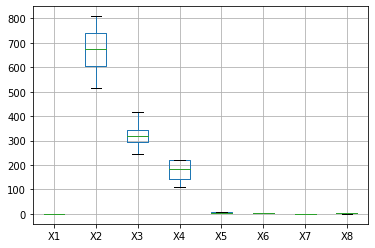

In [7]:
dataset.boxplot(column=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"])

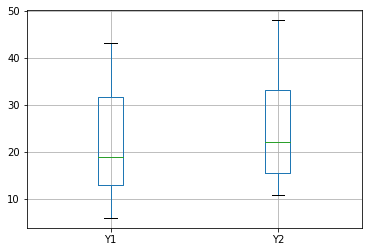

In [8]:
dataset.boxplot(column=["Y1", "Y2"])

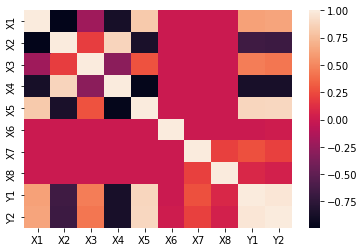

In [9]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [10]:
(dataset[{"X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"}]).corr() > .9

,X7,X6,X8,X4,X2,X1,X3,X5
X7,True,False,False,False,False,False,False,False
X6,False,True,False,False,False,False,False,False
X8,False,False,True,False,False,False,False,False
X4,False,False,False,True,False,False,False,False
X2,False,False,False,False,True,False,False,False
X1,False,False,False,False,False,True,False,False
X3,False,False,False,False,False,False,True,False
X5,False,False,False,False,False,False,False,True


In [11]:
(dataset[{"X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"}]).corr() < -.9

,X7,X6,X8,X4,X2,X1,X3,X5
X7,False,False,False,False,False,False,False,False
X6,False,False,False,False,False,False,False,False
X8,False,False,False,False,False,False,False,False
X4,False,False,False,False,False,False,False,True
X2,False,False,False,False,False,True,False,False
X1,False,False,False,False,True,False,False,False
X3,False,False,False,False,False,False,False,False
X5,False,False,False,True,False,False,False,False


X1 and X2 are related<br>
X4 and X5 related

In [12]:
dataset[{"X1", "X5", "X2", "X4"}].corr()

,X5,X1,X4,X2
X5,1.000000,0.827747,-0.972512,-0.858148
X1,0.827747,1.000000,-0.868823,-0.991901
X4,-0.972512,-0.868823,1.000000,0.880720
X2,-0.858148,-0.991901,0.880720,1.000000


Let us consider dataset2 and drop X1 / X4

In [13]:
dataset2 = dataset.drop(columns={"X1", "X4"})

Let us consider dataset3 and drop X1 / X5

In [14]:
dataset3 = dataset.drop(columns={"X1", "X5"})

Let us consider dataset4 and drop X2 / X4

In [15]:
dataset4 = dataset.drop(columns={"X2", "X4"})

Let us consider dataset5 and drop X2 / X5

In [16]:
dataset5 = dataset.drop(columns={"X2", "X5"})

# Preprocessing Function

In [17]:
def preprocessing(dataset):
  X = dataset.iloc[:, :-1].values
  y = dataset.iloc[:, -1].values

  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

  # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train[:, :] = sc.fit_transform(X_train[:, :])
  X_test[:, :] = sc.transform(X_test[:, :])


  return X_train, X_test, y_train, y_test

# Finding Best Model

In [18]:
def multiplelinearregression(X_train, X_test, y_train, y_test):
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  from sklearn.metrics import r2_score
  return r2_score(y_test, y_pred)

In [19]:
def polynomialregression(X_train, X_test, y_train, y_test):
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  poly_reg = PolynomialFeatures(degree = 4)
  X_poly = poly_reg.fit_transform(X_train)
  regressor = LinearRegression()
  regressor.fit(X_poly, y_train)
  y_pred = regressor.predict(poly_reg.transform(X_test))
  from sklearn.metrics import r2_score
  return(r2_score(y_test, y_pred))

In [20]:
def decisiontree(X_train, X_test, y_train, y_test):
  from sklearn.tree import DecisionTreeRegressor
  regressor = DecisionTreeRegressor(random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(regressor.tree_.max_depth)
  from sklearn.metrics import r2_score
  return r2_score(y_test, y_pred)

In [21]:
def randomForest(X_train, X_test, y_train, y_test):
  from sklearn.ensemble import RandomForestRegressor
  regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  from sklearn.metrics import r2_score
  return r2_score(y_test, y_pred)

In [22]:
def svrs(X_train, X_test, y_train, y_test):
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  y_train = sc_y.fit_transform(y_train.reshape(-1,1))
  from sklearn.svm import SVR
  regressor = SVR(kernel = 'rbf')
  regressor.fit(X_train, y_train.ravel())
  y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1, 1))
  from sklearn.metrics import r2_score
  return r2_score(y_test, y_pred)

In [23]:
def findbestmodel(X_train, X_test, y_train, y_test):
  result = []
  result.append([multiplelinearregression(X_train, X_test, y_train, y_test), "Multiple Linear"])
  result.append([polynomialregression(X_train, X_test, y_train, y_test), "Polynomial"])
  result.append([decisiontree(X_train, X_test, y_train, y_test), "Decision Tree"])
  result.append([randomForest(X_train, X_test, y_train, y_test), "Random Forest"])
  result.append([svrs(X_train, X_test, y_train, y_test), "Support Vector"])

  return max(result)

In [24]:
X_train, X_test, y_train, y_test = preprocessing(dataset)
print(findbestmodel(X_train, X_test, y_train, y_test))

X_train, X_test, y_train, y_test = preprocessing(dataset2)
print(findbestmodel(X_train, X_test, y_train, y_test))

X_train, X_test, y_train, y_test = preprocessing(dataset3)
print(findbestmodel(X_train, X_test, y_train, y_test))

X_train, X_test, y_train, y_test = preprocessing(dataset4)
print(findbestmodel(X_train, X_test, y_train, y_test))

X_train, X_test, y_train, y_test = preprocessing(dataset5)
print(findbestmodel(X_train, X_test, y_train, y_test))


18
[0.9787408395464385, 'Decision Tree']
18
[0.9811414231066395, 'Decision Tree']
18
[0.978718572714163, 'Decision Tree']
18
[0.9786238131121481, 'Decision Tree']
18
[0.9798032576402889, 'Decision Tree']


**As we can see, the best result is obtained using Decision Tree Regression.**<br>
We tested the original dataset as well as other datasets obtained after correlation analysis.<br>
The best accuracy was obtained on dataset2 where we dropped columns X1 and X4.<br>
Accuracy Obtained: **0.9811414231066395**

In [25]:
def decisiontree(X_train, X_test, y_train, y_test, i):
  from sklearn.tree import DecisionTreeRegressor
  regressor = DecisionTreeRegressor(random_state = 0, max_depth = i)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(regressor.tree_.max_depth)
  from sklearn.metrics import r2_score
  return r2_score(y_test, y_pred)

In [26]:
X_train, X_test, y_train, y_test = preprocessing(dataset2)
for i in range(1, 18):
  print(decisiontree(X_train, X_test, y_train, y_test, i))

1
0.7869390967491975
2
0.8998723641431341
3
0.9417408661816823
4
0.9567461524183587
5
0.9645505486878869
6
0.9733838011158988
7
0.9739985314379452
8
0.976758678789575
9
0.9763379994203787
10
0.9758537914300365
11
0.9760666105218394
12
0.9787172397389474
13
0.9803964826887537
14
0.9785098426626211
15
0.9800778801610648
16
0.9791086381570343
17
0.9785731267702577


Max Depth Of Regression Tree:  13
Final Accuracy:  0.9803964826887537


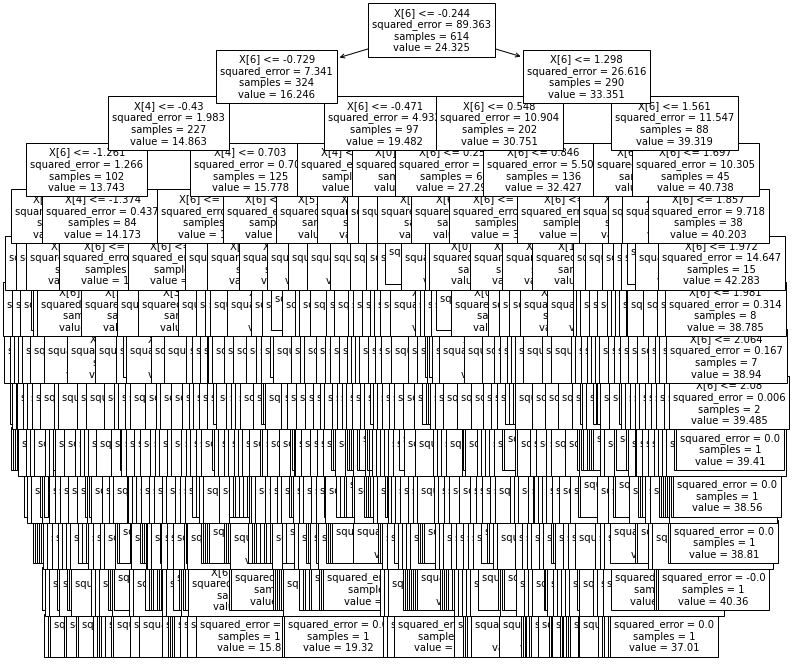

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 13)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Max Depth Of Regression Tree: ", regressor.tree_.max_depth)
from sklearn.metrics import r2_score
print("Final Accuracy: ", r2_score(y_test, y_pred))

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(regressor, fontsize=10)
plt.show()